In [144]:
# load data set and import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn

In [145]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [146]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
124,6.7,3.3,5.7,2.1,virginica
84,5.4,3.0,4.5,1.5,versicolor
130,7.4,2.8,6.1,1.9,virginica
15,5.7,4.4,1.5,0.4,setosa
80,5.5,2.4,3.8,1.1,versicolor


In [147]:
X = df.iloc[:,:-1]
y = df.iloc[: ,-1]

In [148]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [149]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Random Forest Classification

In [150]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)

RandomForestClassifier()

In [151]:
model.predict([[5.1,3.5,1.4,0.2]])

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [162]:
model.predict([[6.1,3.0,4.9,1.8]])

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [163]:
model.predict([[5.7,3.0,4.2,1.2]])

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [165]:
X_train.shape

(120, 4)

In [166]:
X_test.shape

(30, 4)

In [167]:
yp =model.predict(X_test)
yp

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

## accuracy_score

In [168]:
score = model.score(X_test,y_test)
score

1.0

## accuracy_score

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yp)

1.0

### confusion Matrix

In [170]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,yp)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score : 1.0')

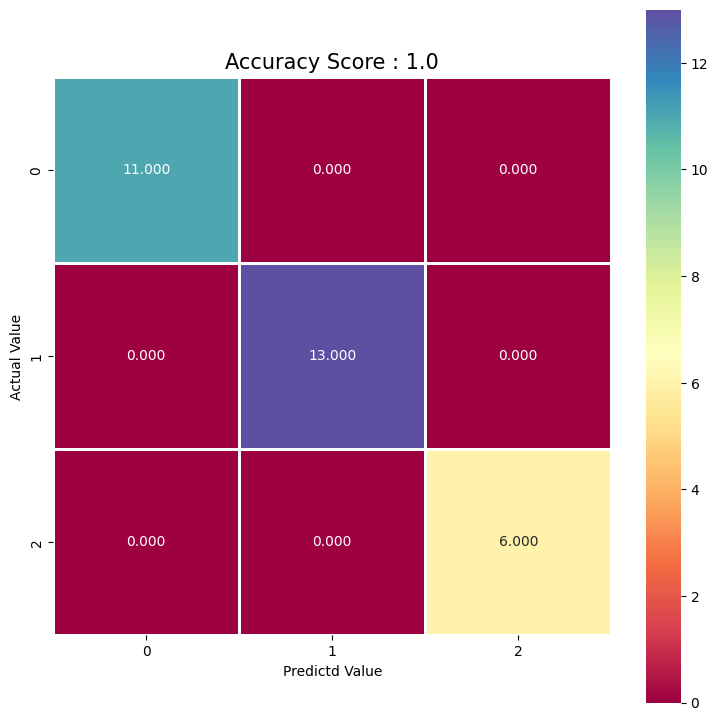

In [171]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot =True,fmt=".3f",linewidths=.9,square=True,
            cmap ="Spectral");
plt.ylabel("Actual Value")
plt.xlabel("Predictd Value")
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size =15)

## RandomForestRegressor

In [172]:
from sklearn.ensemble import RandomForestRegressor